In [1]:
import sys, os, cv2
module_rootdir = '../../..'
dataset_rootdir = '../../../../'
label_rootdir = module_rootdir
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.bdd_dataset_utils.remapped_bdd_utils import load_ground_truths
from modules.augmentation.lib.mixup_transform import mixup
from modules.augmentation.lib.geometric_transform import resize_with_warping
from modules.plot.viz_annotation import draw_bbox_on_img_data
from modules.dataset_utils.bdd_dataset_utils import constants

In [2]:
sel_train_labels_file = config_dataset.bdd_sel_train_labels_file
train_images_dir = config_dataset.bdd_train_images_dir

selected_labels = load_ground_truths(
    label_rootdir,
    sel_train_labels_file, 
    dataset_rootdir,
    train_images_dir, 
    verbose=True)

Load JSON file .. please wait
annotations from 1/69863 aggregated
annotations from 2001/69863 aggregated
annotations from 4001/69863 aggregated
annotations from 6001/69863 aggregated
annotations from 8001/69863 aggregated
annotations from 10001/69863 aggregated
annotations from 12001/69863 aggregated
annotations from 14001/69863 aggregated
annotations from 16001/69863 aggregated
annotations from 18001/69863 aggregated
annotations from 20001/69863 aggregated
annotations from 22001/69863 aggregated
annotations from 24001/69863 aggregated
annotations from 26001/69863 aggregated
annotations from 28001/69863 aggregated
annotations from 30001/69863 aggregated
annotations from 32001/69863 aggregated
annotations from 34001/69863 aggregated
annotations from 36001/69863 aggregated
annotations from 38001/69863 aggregated
annotations from 40001/69863 aggregated
annotations from 42001/69863 aggregated
annotations from 44001/69863 aggregated
annotations from 46001/69863 aggregated
annotations from 4

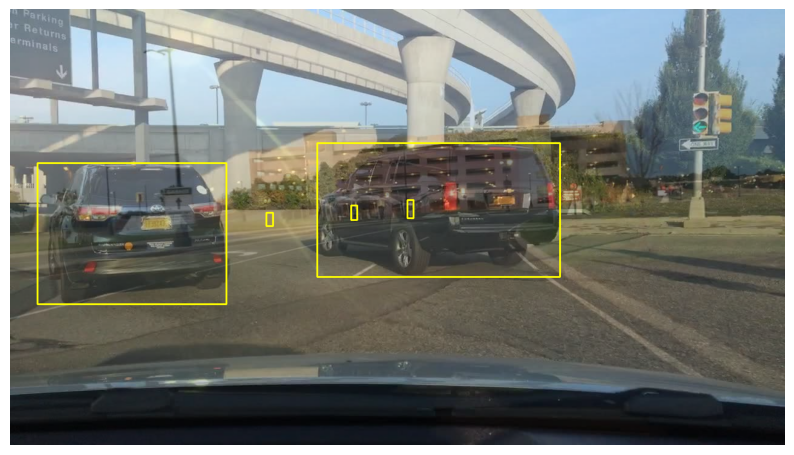

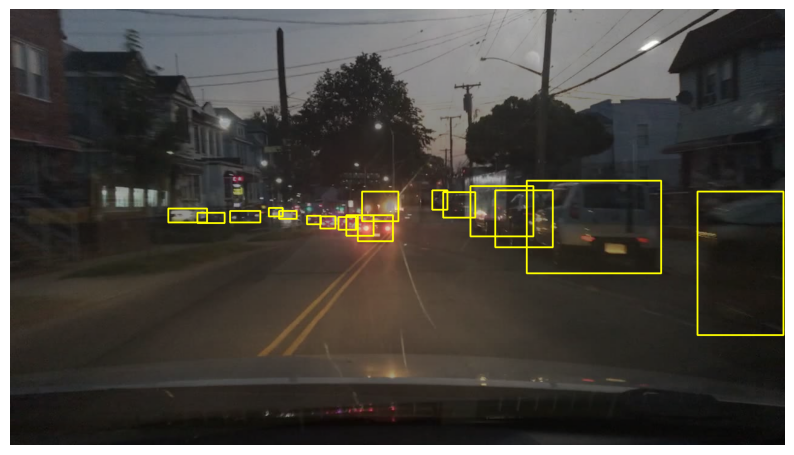

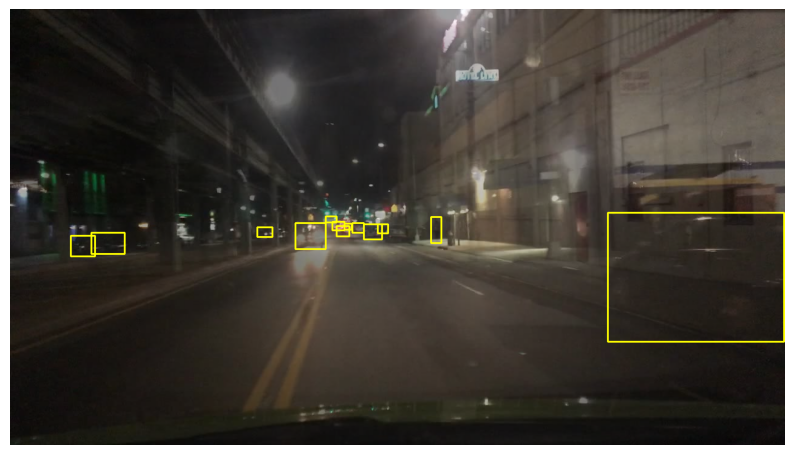

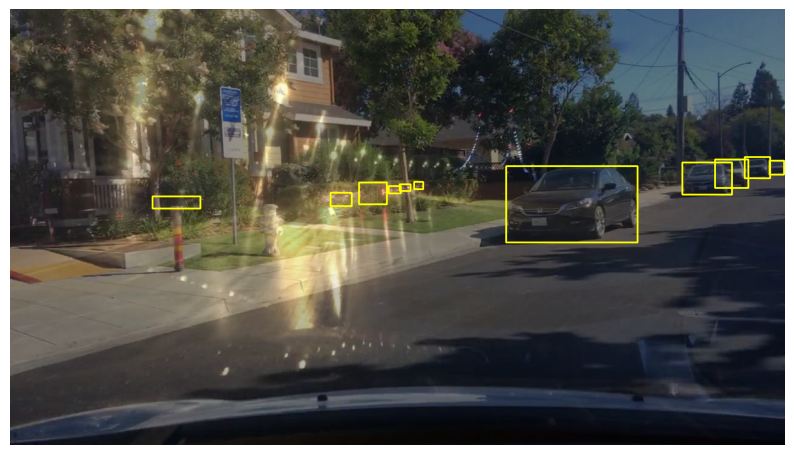

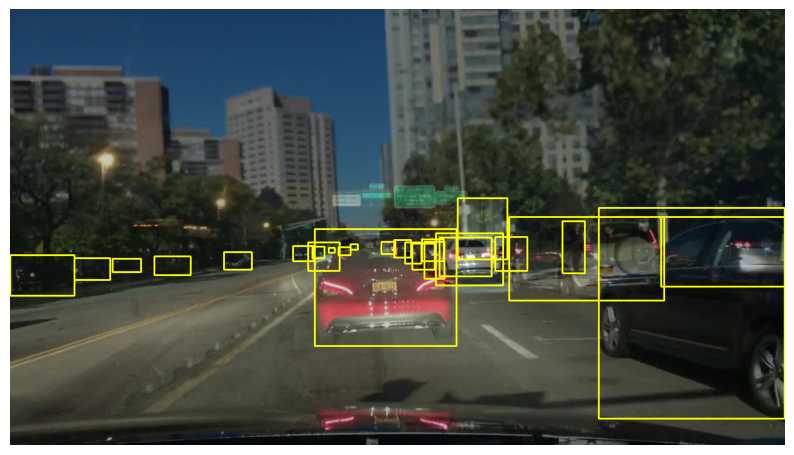

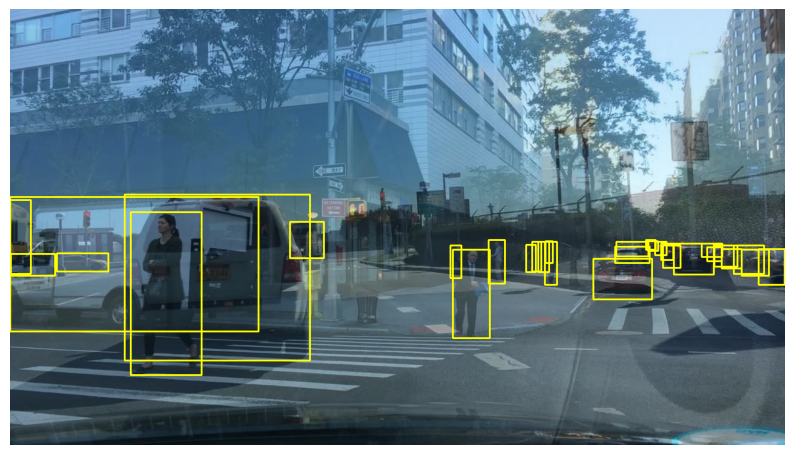

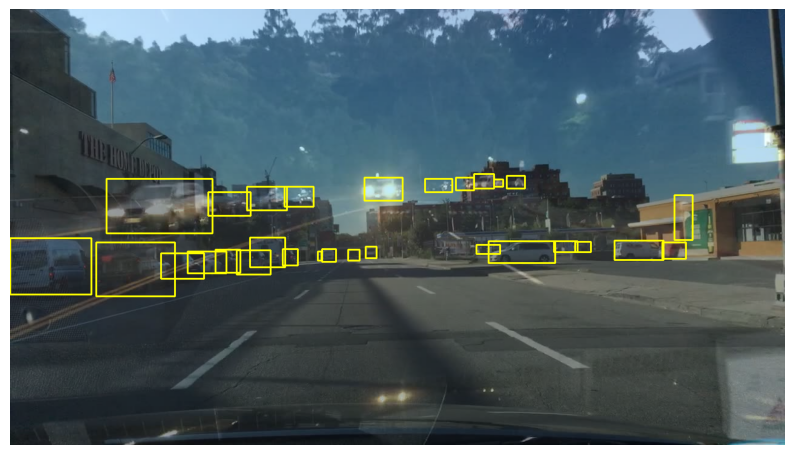

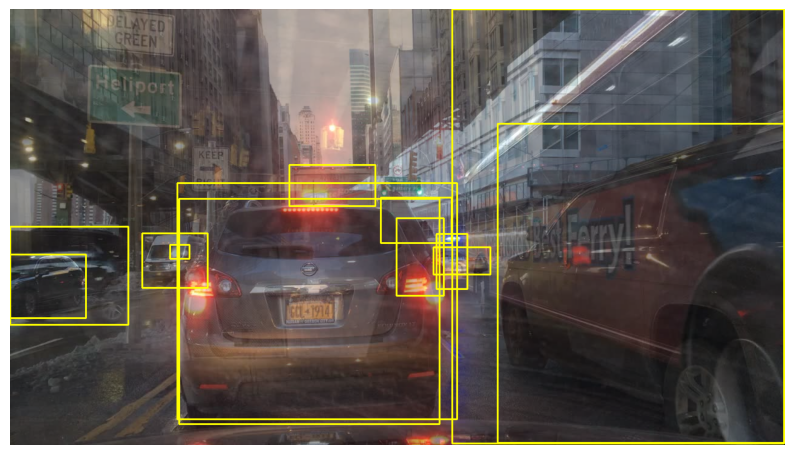

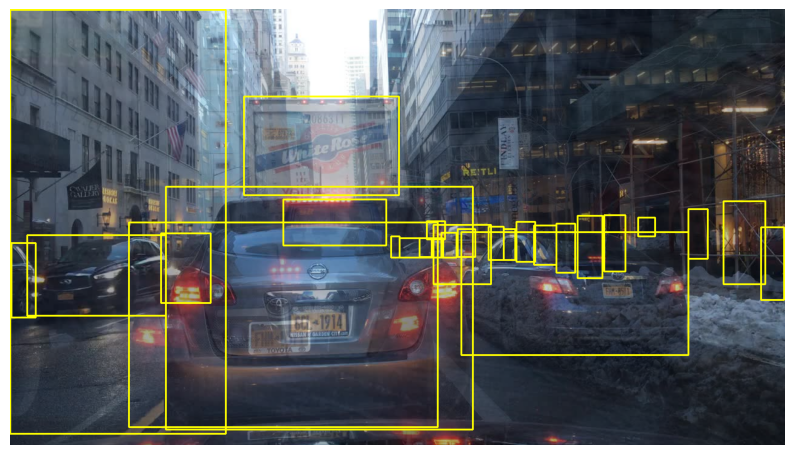

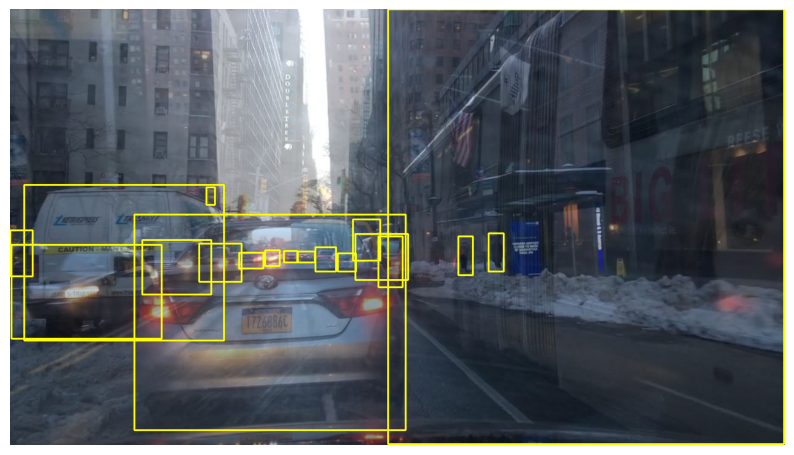

In [3]:
mixup_obj = mixup(alpha=32.0, beta=32.0)

for i in range(10):

    idx1 = 2*i
    idx2 = 2*i + 1

    img_path1 = selected_labels[idx1]['img_path']
    img_path2 = selected_labels[idx2]['img_path']

    objCategoryid1 = selected_labels[idx1]['objCategoryid']
    objCategoryid2 = selected_labels[idx2]['objCategoryid']

    boundingBox2D1 = selected_labels[idx1]['boundingBox2D']
    boundingBox2D2 = selected_labels[idx2]['boundingBox2D']

    image_rgb1 = cv2.cvtColor(cv2.imread(img_path1), cv2.COLOR_BGR2RGB)
    image_rgb2 = cv2.cvtColor(cv2.imread(img_path2), cv2.COLOR_BGR2RGB)

    image_rgb1, boundingBox2D1 = resize_with_warping(image_rgb1, boundingBox2D1, constants._IMG_H_, constants._IMG_W_) 
    image_rgb2, boundingBox2D2 = resize_with_warping(image_rgb2, boundingBox2D2, constants._IMG_H_, constants._IMG_W_)

    new_img, bboxes, classlabels = mixup_obj.create_mixup(
        image1=image_rgb1, 
        image2=image_rgb2, 
        bbox1=boundingBox2D1, 
        bbox2=boundingBox2D2, 
        classlabels1=objCategoryid1, 
        classlabels2=objCategoryid2)

    draw_bbox_on_img_data(new_img, bboxes, figsize=(10,8))